In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from plot_utils import *

## PLOT DA FARE: 
1. Metti a confronto per ogni modello le curve di speedup così da fare vedere l'impatto del miniatch;
2. Per ogni minibatch confronta le curve di speedup tra i vari modelli così da mostrare l'impatto del modello.

#TODO: Cambia i parametri delle varie chiamate di speedup (devi considerare il programma con un solo worker) -> scalabilità standard

## Altre Statistiche:
1. Quantità di memoria usata;
2. Dati trasmessi tramite la rete.

# Minibatch Comparison

## Base

In [2]:
ddp_1_b_64_eth1 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_1_minibatch_64_vit-base-patch16-224-in21k_model_eth1.csv")
ddp_2_b_64_eth1 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_2_minibatch_64_vit-base-patch16-224-in21k_model_eth1.csv")
ddp_4_b_64_eth1 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_4_minibatch_64_vit-base-patch16-224-in21k_model_eth1.csv")

ddp_1_b_64_ib0 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_1_minibatch_64_vit-base-patch16-224-in21k_model_ib0.csv")
ddp_2_b_64_ib0 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_2_minibatch_64_vit-base-patch16-224-in21k_model_ib0.csv")
ddp_4_b_64_ib0 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_4_minibatch_64_vit-base-patch16-224-in21k_model_ib0.csv")

ddp_1_b_64_eth1 = ddp_1_b_64_eth1[ddp_1_b_64_eth1['phase'] == 'train']
ddp_2_b_64_eth1 = ddp_2_b_64_eth1[ddp_2_b_64_eth1['phase'] == 'train']
ddp_4_b_64_eth1 = ddp_4_b_64_eth1[ddp_4_b_64_eth1['phase'] == 'train']

ddp_1_b_64_ib0 = ddp_1_b_64_ib0[ddp_1_b_64_ib0['phase'] == 'train']
ddp_2_b_64_ib0 = ddp_2_b_64_ib0[ddp_2_b_64_ib0['phase'] == 'train']
ddp_4_b_64_ib0 = ddp_4_b_64_ib0[ddp_4_b_64_ib0['phase'] == 'train']

In [3]:
ddp_1_b_128_eth1 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_1_minibatch_128_vit-base-patch16-224-in21k_model_eth1.csv")
ddp_2_b_128_eth1 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_2_minibatch_128_vit-base-patch16-224-in21k_model_eth1.csv")
ddp_4_b_128_eth1 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_4_minibatch_128_vit-base-patch16-224-in21k_model_eth1.csv")

ddp_1_b_128_ib0 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_1_minibatch_128_vit-base-patch16-224-in21k_model_ib0.csv")
ddp_2_b_128_ib0 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_2_minibatch_128_vit-base-patch16-224-in21k_model_ib0.csv")
ddp_4_b_128_ib0 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_4_minibatch_128_vit-base-patch16-224-in21k_model_ib0.csv")

ddp_1_b_128_eth1 = ddp_1_b_128_eth1[ddp_1_b_128_eth1['phase'] == 'train']
ddp_2_b_128_eth1 = ddp_2_b_128_eth1[ddp_2_b_128_eth1['phase'] == 'train']
ddp_4_b_128_eth1 = ddp_4_b_128_eth1[ddp_4_b_128_eth1['phase'] == 'train']

ddp_1_b_128_ib0 = ddp_1_b_128_ib0[ddp_1_b_128_ib0['phase'] == 'train']
ddp_2_b_128_ib0 = ddp_2_b_128_ib0[ddp_2_b_128_ib0['phase'] == 'train']
ddp_4_b_128_ib0 = ddp_4_b_128_ib0[ddp_4_b_128_ib0['phase'] == 'train']

In [4]:
ddp_1_b_256_eth1 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_1_minibatch_256_vit-base-patch16-224-in21k_model_eth1.csv")
ddp_2_b_256_eth1 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_2_minibatch_256_vit-base-patch16-224-in21k_model_eth1.csv")
ddp_4_b_256_eth1 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_4_minibatch_256_vit-base-patch16-224-in21k_model_eth1.csv")

ddp_1_b_256_ib0 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_1_minibatch_256_vit-base-patch16-224-in21k_model_ib0.csv")
ddp_2_b_256_ib0 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_2_minibatch_256_vit-base-patch16-224-in21k_model_ib0.csv")
ddp_4_b_256_ib0 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_4_minibatch_256_vit-base-patch16-224-in21k_model_ib0.csv")

ddp_1_b_256_eth1 = ddp_1_b_256_eth1[ddp_1_b_256_eth1['phase'] == 'train']
ddp_2_b_256_eth1 = ddp_2_b_256_eth1[ddp_2_b_256_eth1['phase'] == 'train']
ddp_4_b_256_eth1 = ddp_4_b_256_eth1[ddp_4_b_256_eth1['phase'] == 'train']

ddp_1_b_256_ib0 = ddp_1_b_256_ib0[ddp_1_b_256_ib0['phase'] == 'train']
ddp_2_b_256_ib0 = ddp_2_b_256_ib0[ddp_2_b_256_ib0['phase'] == 'train']
ddp_4_b_256_eth1 = ddp_4_b_256_eth1[ddp_4_b_256_eth1['phase'] == 'train']

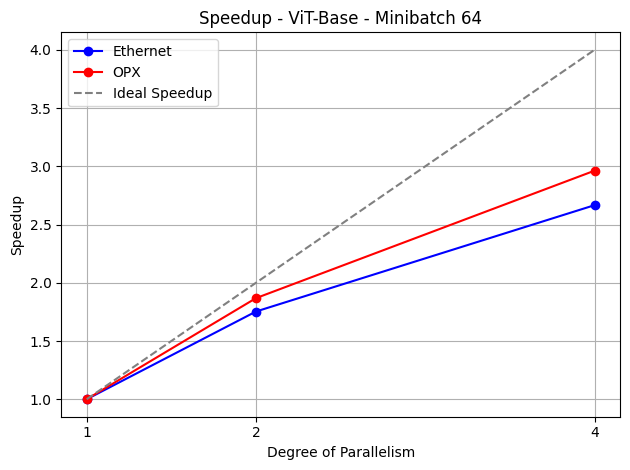

In [5]:
plot_speedup([ddp_1_b_64_eth1, ddp_2_b_64_eth1, ddp_4_b_64_eth1], "Speedup - ViT-Base - Minibatch 64", "Ethernet", color='blue', plot_ideal=False)
plot_speedup([ddp_1_b_64_eth1, ddp_2_b_64_ib0, ddp_4_b_64_ib0], "Speedup - ViT-Base - Minibatch 64", "OPX", color='red', plot_ideal=True)
plt.tight_layout()

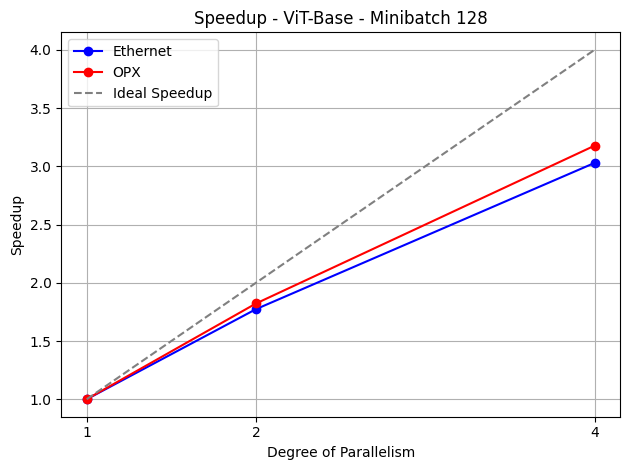

In [6]:
plot_speedup([ddp_1_b_128_eth1, ddp_2_b_128_eth1, ddp_4_b_128_eth1], "Speedup - ViT-Base - Minibatch 128", "Ethernet", color='blue', plot_ideal=False)
plot_speedup([ddp_1_b_128_eth1, ddp_2_b_128_ib0, ddp_4_b_128_ib0], "Speedup - ViT-Base - Minibatch 128", "OPX", color='red', plot_ideal=True)
plt.tight_layout()

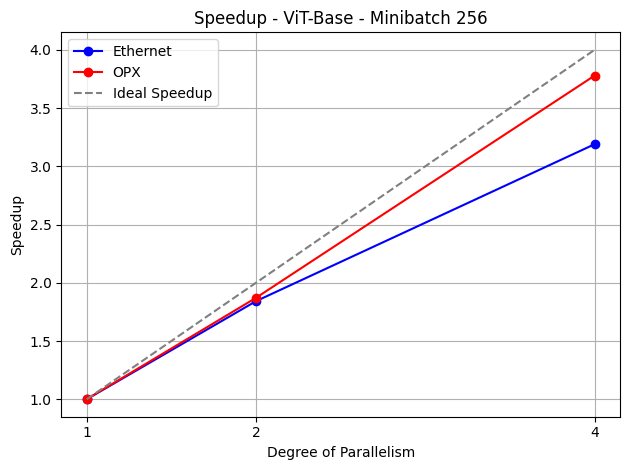

In [7]:
plot_speedup([ddp_1_b_256_eth1, ddp_2_b_256_eth1, ddp_4_b_256_eth1], "Speedup - ViT-Base - Minibatch 256", "Ethernet", color='blue', plot_ideal=False)
plot_speedup([ddp_1_b_256_ib0, ddp_2_b_256_ib0, ddp_4_b_256_ib0], "Speedup - ViT-Base - Minibatch 256", "OPX", color='red', plot_ideal=True)
plt.tight_layout()

## Large

In [8]:
ddp_1_l_64_eth1 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_1_minibatch_64_vit-large-patch16-224-in21k_model_eth1.csv")
ddp_2_l_64_eth1 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_2_minibatch_64_vit-large-patch16-224-in21k_model_eth1.csv")
ddp_4_l_64_eth1 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_4_minibatch_64_vit-large-patch16-224-in21k_model_eth1.csv")

ddp_1_l_64_ib0 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_1_minibatch_64_vit-large-patch16-224-in21k_model_ib0.csv")
ddp_2_l_64_ib0 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_2_minibatch_64_vit-large-patch16-224-in21k_model_ib0.csv")
ddp_4_l_64_ib0 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_4_minibatch_64_vit-large-patch16-224-in21k_model_ib0.csv")

ddp_1_l_64_eth1 = ddp_1_l_64_eth1[ddp_1_l_64_eth1['phase'] == 'train']
ddp_2_l_64_eth1 = ddp_2_l_64_eth1[ddp_2_l_64_eth1['phase'] == 'train']
ddp_4_l_64_eth1 = ddp_4_l_64_eth1[ddp_4_l_64_eth1['phase'] == 'train']

ddp_1_l_64_ib0 = ddp_1_l_64_ib0[ddp_1_l_64_ib0['phase'] == 'train']
ddp_2_l_64_ib0 = ddp_2_l_64_ib0[ddp_2_l_64_ib0['phase'] == 'train']
ddp_4_l_64_ib0 = ddp_4_l_64_ib0[ddp_4_l_64_ib0['phase'] == 'train']

In [9]:
ddp_1_l_128_eth1 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_1_minibatch_128_vit-large-patch16-224-in21k_model_eth1.csv")
ddp_2_l_128_eth1 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_2_minibatch_128_vit-large-patch16-224-in21k_model_eth1.csv")
ddp_4_l_128_eth1 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_4_minibatch_128_vit-large-patch16-224-in21k_model_eth1.csv")

ddp_1_l_128_ib0 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_1_minibatch_128_vit-large-patch16-224-in21k_model_ib0.csv")
ddp_2_l_128_ib0 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_2_minibatch_128_vit-large-patch16-224-in21k_model_ib0.csv")
ddp_4_l_128_ib0 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_4_minibatch_128_vit-large-patch16-224-in21k_model_ib0.csv")

ddp_1_l_128_eth1 = ddp_1_l_128_eth1[ddp_1_l_128_eth1['phase'] == 'train']
ddp_2_l_128_eth1 = ddp_2_l_128_eth1[ddp_2_l_128_eth1['phase'] == 'train']
ddp_4_l_128_eth1 = ddp_4_l_128_eth1[ddp_4_l_128_eth1['phase'] == 'train']

ddp_1_l_128_ib0 = ddp_1_l_128_ib0[ddp_1_l_128_ib0['phase'] == 'train']
ddp_2_l_128_ib0 = ddp_2_l_128_ib0[ddp_2_l_128_ib0['phase'] == 'train']
ddp_4_l_128_ib0 = ddp_4_l_128_ib0[ddp_4_l_128_ib0['phase'] == 'train']

In [10]:
ddp_1_l_256_eth1 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_1_minibatch_256_vit-large-patch16-224-in21k_model_eth1.csv")
ddp_2_l_256_eth1 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_2_minibatch_256_vit-large-patch16-224-in21k_model_eth1.csv")
ddp_4_l_256_eth1 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_4_minibatch_256_vit-large-patch16-224-in21k_model_eth1.csv")

ddp_1_l_256_ib0 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_1_minibatch_256_vit-large-patch16-224-in21k_model_ib0.csv")
ddp_2_l_256_ib0 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_2_minibatch_256_vit-large-patch16-224-in21k_model_ib0.csv")
ddp_4_l_256_ib0 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_4_minibatch_256_vit-large-patch16-224-in21k_model_ib0.csv")

ddp_1_l_256_eth1 = ddp_1_l_256_eth1[ddp_1_l_256_eth1['phase'] == 'train']
ddp_2_l_256_eth1 = ddp_2_l_256_eth1[ddp_2_l_256_eth1['phase'] == 'train']
ddp_4_l_256_eth1 = ddp_4_l_256_eth1[ddp_4_l_256_eth1['phase'] == 'train']

ddp_1_l_256_ib0 = ddp_1_l_256_ib0[ddp_1_l_256_ib0['phase'] == 'train']
ddp_2_l_256_ib0 = ddp_2_l_256_ib0[ddp_2_l_256_ib0['phase'] == 'train']
ddp_4_l_256_eth1 = ddp_4_l_256_eth1[ddp_4_l_256_eth1['phase'] == 'train']

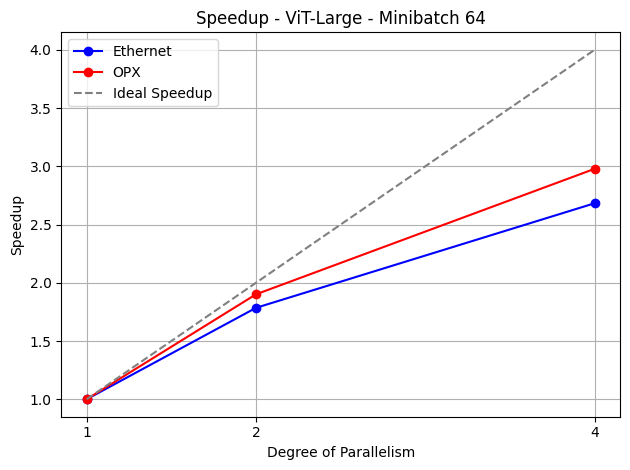

In [11]:
plot_speedup([ddp_1_l_64_eth1, ddp_2_l_64_eth1, ddp_4_l_64_eth1], "Speedup - ViT-Large - Minibatch 64", "Ethernet", color='blue', plot_ideal=False)
plot_speedup([ddp_1_l_64_ib0, ddp_2_l_64_ib0, ddp_4_l_64_ib0], "Speedup - ViT-Large - Minibatch 64", "OPX", color='red', plot_ideal=True)
plt.tight_layout()

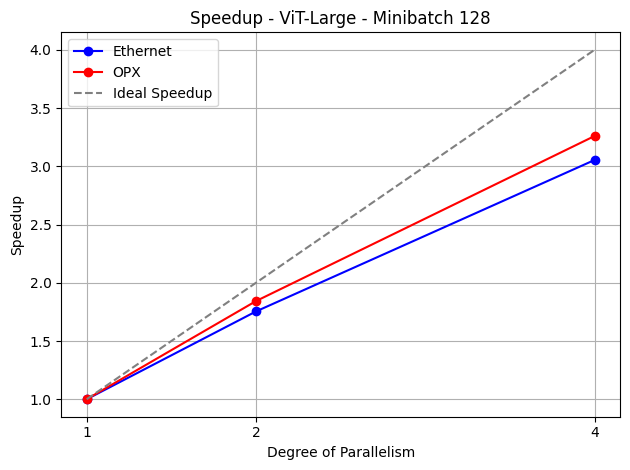

In [12]:
plot_speedup([ddp_1_l_128_eth1, ddp_2_l_128_eth1, ddp_4_l_128_eth1], "Speedup - ViT-Large - Minibatch 128", "Ethernet", color='blue', plot_ideal=False)
plot_speedup([ddp_1_l_128_ib0, ddp_2_l_128_ib0, ddp_4_l_128_ib0], "Speedup - ViT-Large - Minibatch 128", "OPX", color='red', plot_ideal=True)
plt.tight_layout()

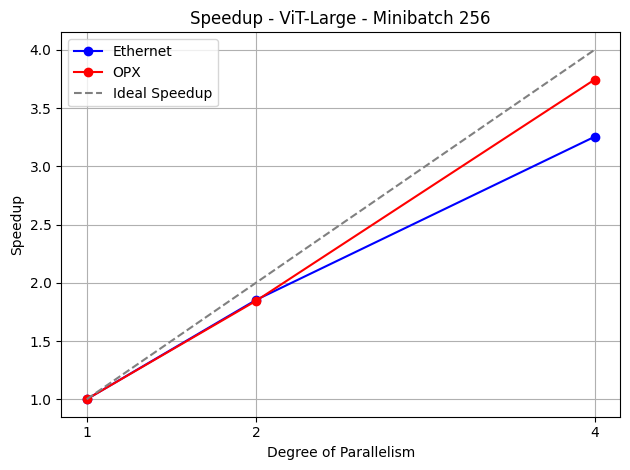

In [13]:
plot_speedup([ddp_1_l_256_eth1, ddp_2_l_256_eth1, ddp_4_l_256_eth1], "Speedup - ViT-Large - Minibatch 256", "Ethernet", color='blue', plot_ideal=False)
plot_speedup([ddp_1_l_256_ib0, ddp_2_l_256_ib0, ddp_4_l_256_ib0], "Speedup - ViT-Large - Minibatch 256", "OPX", color='red', plot_ideal=True)
plt.tight_layout()

## Huge

In [14]:
ddp_1_h_64_eth1 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_1_minibatch_64_vit-huge-patch14-224-in21k_model_eth1.csv")
ddp_2_h_64_eth1 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_2_minibatch_64_vit-huge-patch14-224-in21k_model_eth1.csv")
ddp_4_h_64_eth1 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_4_minibatch_64_vit-huge-patch14-224-in21k_model_eth1.csv")

ddp_1_h_64_ib0 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_1_minibatch_64_vit-huge-patch14-224-in21k_model_ib0.csv")
ddp_2_h_64_ib0 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_2_minibatch_64_vit-huge-patch14-224-in21k_model_ib0.csv")
ddp_4_h_64_ib0 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_4_minibatch_64_vit-huge-patch14-224-in21k_model_ib0.csv")

ddp_1_h_64_eth1 = ddp_1_h_64_eth1[ddp_1_h_64_eth1['phase'] == 'train']
ddp_2_h_64_eth1 = ddp_2_h_64_eth1[ddp_2_h_64_eth1['phase'] == 'train']
ddp_4_h_64_eth1 = ddp_4_h_64_eth1[ddp_4_h_64_eth1['phase'] == 'train']

ddp_1_h_64_ib0 = ddp_1_h_64_ib0[ddp_1_h_64_ib0['phase'] == 'train']
ddp_2_h_64_ib0 = ddp_2_h_64_ib0[ddp_2_h_64_ib0['phase'] == 'train']
ddp_4_h_64_ib0 = ddp_4_h_64_ib0[ddp_4_h_64_ib0['phase'] == 'train']

In [15]:
ddp_1_h_128_eth1 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_1_minibatch_128_vit-huge-patch14-224-in21k_model_eth1.csv")
ddp_2_h_128_eth1 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_2_minibatch_128_vit-huge-patch14-224-in21k_model_eth1.csv")
ddp_4_h_128_eth1 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_4_minibatch_128_vit-huge-patch14-224-in21k_model_eth1.csv")

ddp_1_h_128_ib0 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_1_minibatch_128_vit-huge-patch14-224-in21k_model_ib0.csv")
ddp_2_h_128_ib0 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_2_minibatch_128_vit-huge-patch14-224-in21k_model_ib0.csv")
ddp_4_h_128_ib0 = pd.read_csv("../log/synch_ddp/rank_0_synch_ddp_4_minibatch_128_vit-huge-patch14-224-in21k_model_ib0.csv")

ddp_1_h_128_eth1 = ddp_1_h_128_eth1[ddp_1_h_128_eth1['phase'] == 'train']
ddp_2_h_128_eth1 = ddp_2_h_128_eth1[ddp_2_h_128_eth1['phase'] == 'train']
ddp_4_h_128_eth1 = ddp_4_h_128_eth1[ddp_4_h_128_eth1['phase'] == 'train']

ddp_1_h_128_ib0 = ddp_1_h_128_ib0[ddp_1_h_128_ib0['phase'] == 'train']
ddp_2_h_128_ib0 = ddp_2_h_128_ib0[ddp_2_h_128_ib0['phase'] == 'train']
ddp_4_h_128_ib0 = ddp_4_h_128_ib0[ddp_4_h_128_ib0['phase'] == 'train']

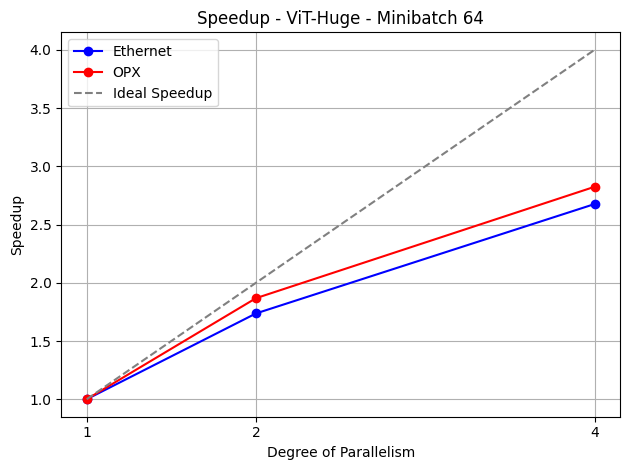

In [16]:
plot_speedup([ddp_1_h_64_eth1, ddp_2_h_64_eth1, ddp_4_h_64_eth1], "Speedup - ViT-Huge - Minibatch 64", "Ethernet", color='blue', plot_ideal=False)
plot_speedup([ddp_1_h_64_ib0, ddp_2_h_64_ib0, ddp_4_h_64_ib0], "Speedup - ViT-Huge - Minibatch 64", "OPX", color='red', plot_ideal=True)
plt.tight_layout()

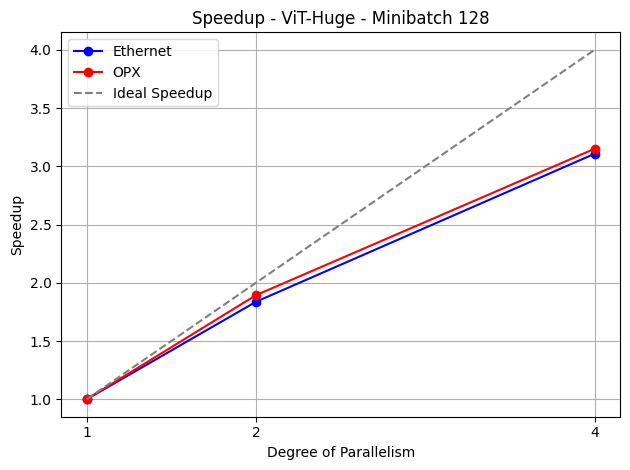

In [17]:
plot_speedup([ddp_1_h_128_eth1, ddp_2_h_128_eth1, ddp_4_h_128_eth1], "Speedup - ViT-Huge - Minibatch 128", "Ethernet", color='blue', plot_ideal=False)
plot_speedup([ddp_1_h_128_ib0, ddp_2_h_128_ib0, ddp_4_h_128_ib0], "Speedup - ViT-Huge - Minibatch 128", "OPX", color='red', plot_ideal=True)
plt.tight_layout()

# Memory Usage